Loading and preprocessing data...
Handling 201 missing BMI values using median imputation

Splitting and scaling data...

Handling imbalanced data...
Class distribution before resampling: [3889  199]
Class distribution after resampling: [3889 3889]

Creating models...

Evaluating Logistic Regression...
Accuracy: 0.7495
Precision: 0.1399
Recall: 0.8000
F1 Score: 0.2381
ROC AUC: 0.8445


<Figure size 800x600 with 0 Axes>

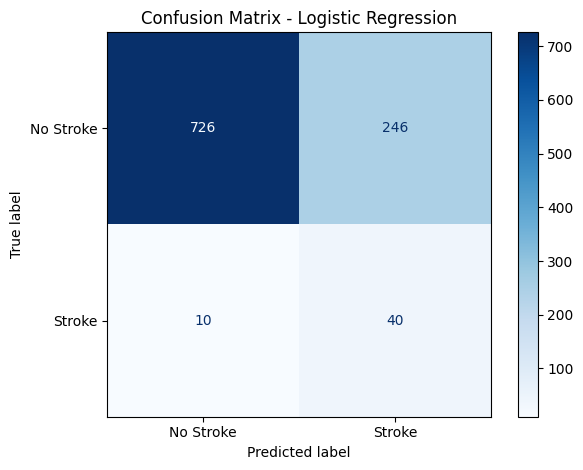

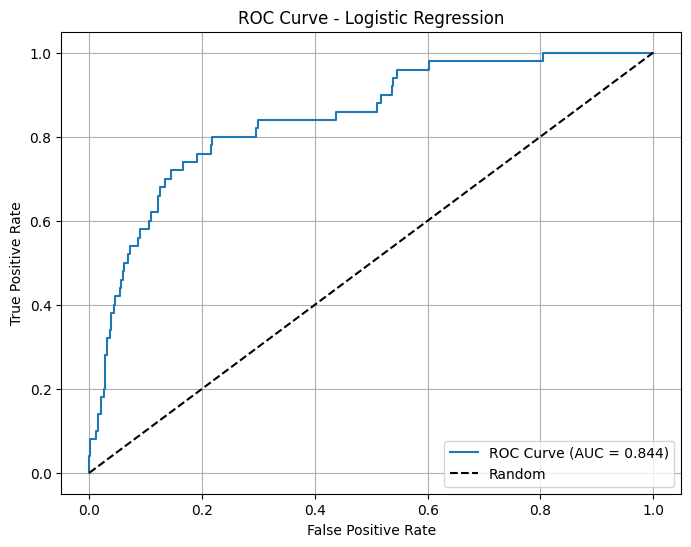


Evaluating Decision Tree...
Accuracy: 0.8757
Precision: 0.0947
Recall: 0.1800
F1 Score: 0.1241
ROC AUC: 0.5458


<Figure size 800x600 with 0 Axes>

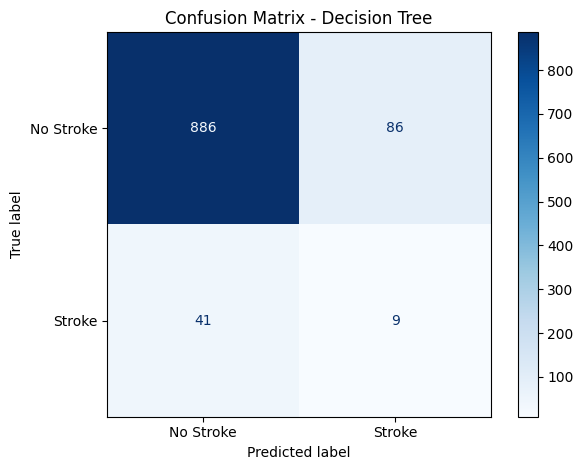

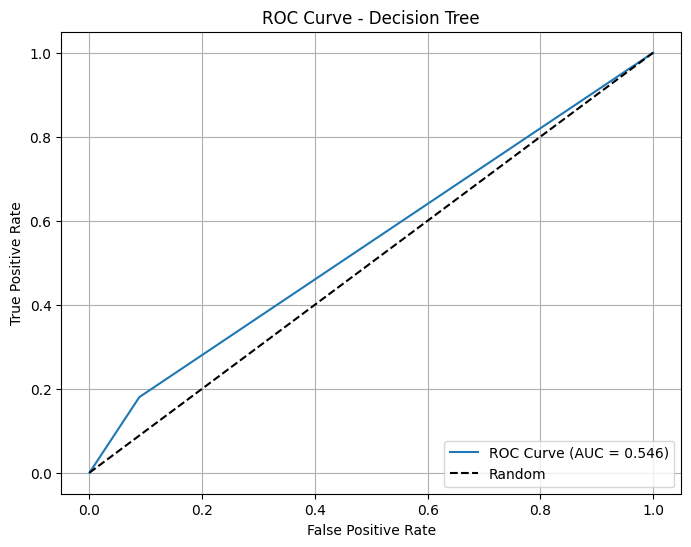


Evaluating Random Forest...
Accuracy: 0.9188
Precision: 0.1633
Recall: 0.1600
F1 Score: 0.1616
ROC AUC: 0.7830


<Figure size 800x600 with 0 Axes>

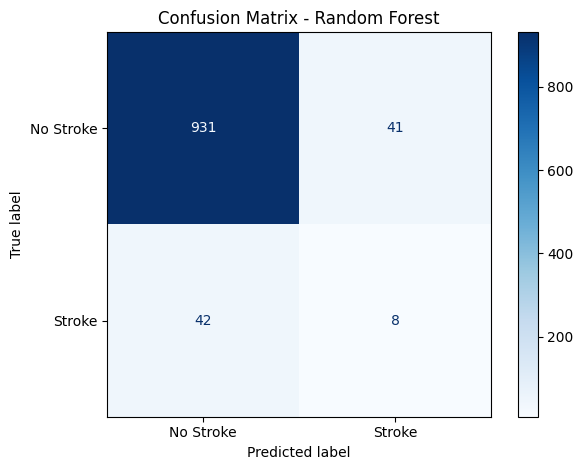

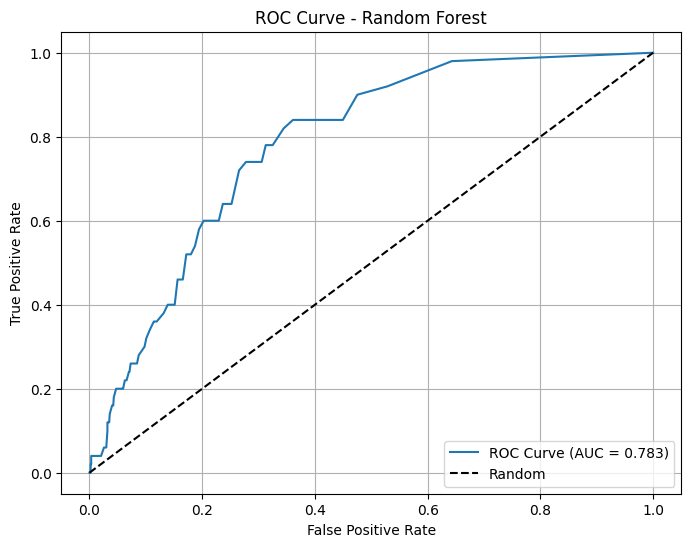


Evaluating Gradient Boosting...
Accuracy: 0.8571
Precision: 0.1522
Recall: 0.4200
F1 Score: 0.2234
ROC AUC: 0.7942


<Figure size 800x600 with 0 Axes>

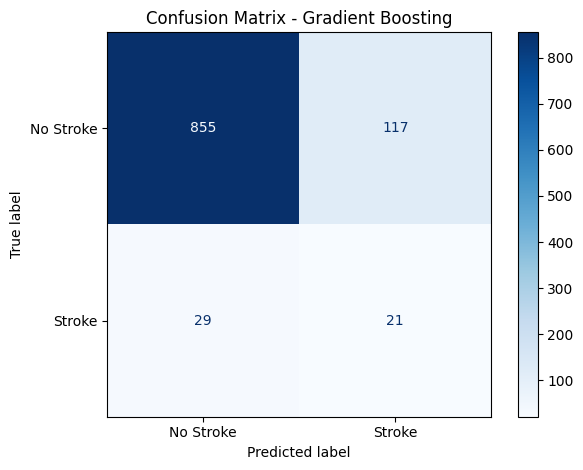

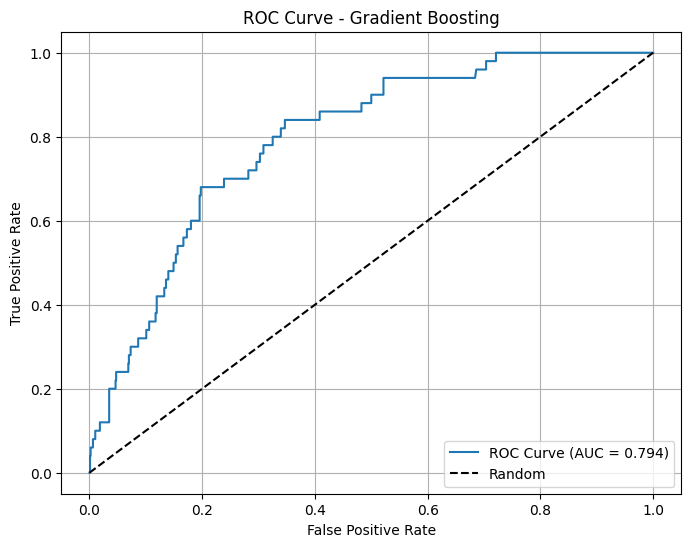


Evaluating XGBoost...
Accuracy: 0.9129
Precision: 0.0851
Recall: 0.0800
F1 Score: 0.0825
ROC AUC: 0.7864


<Figure size 800x600 with 0 Axes>

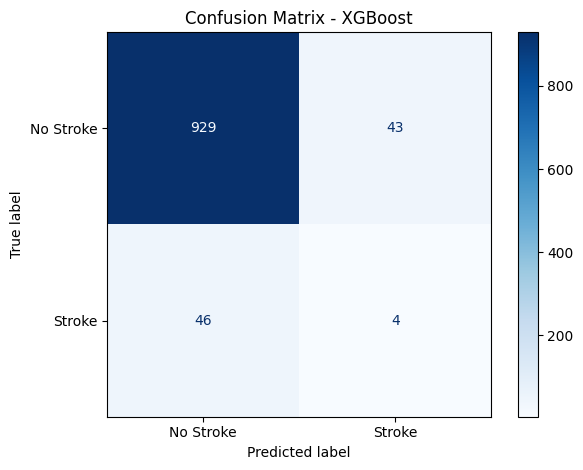

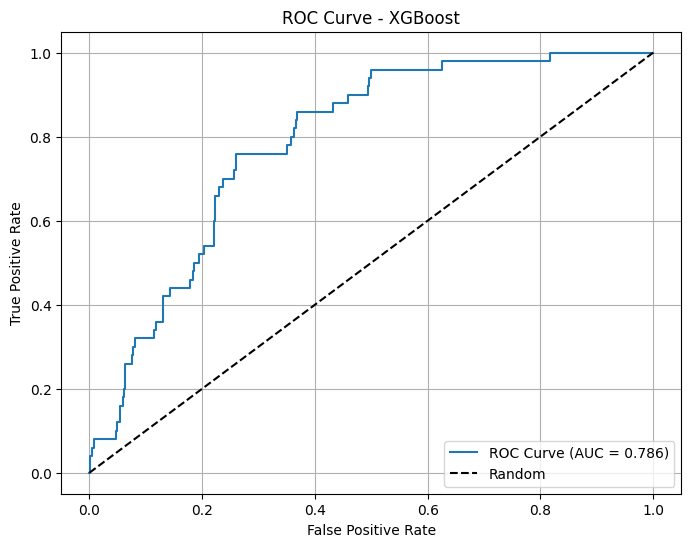


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9384
Precision: 0.2759
Recall: 0.1600
F1 Score: 0.2025
ROC AUC: 0.8017


<Figure size 800x600 with 0 Axes>

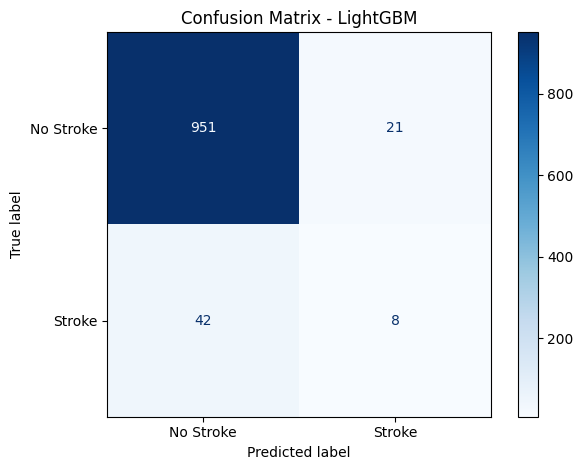

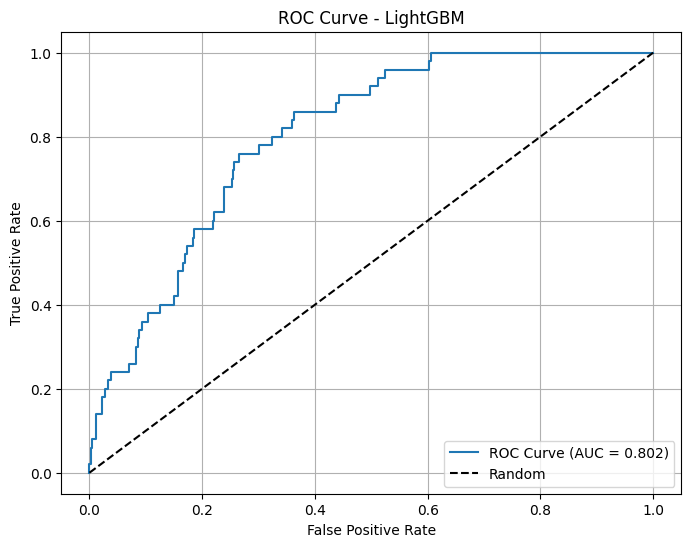


Evaluating KNN...
Accuracy: 0.8190
Precision: 0.1143
Recall: 0.4000
F1 Score: 0.1778
ROC AUC: 0.6874


<Figure size 800x600 with 0 Axes>

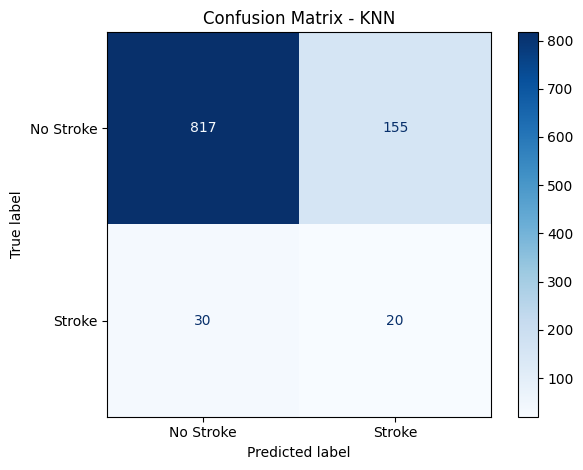

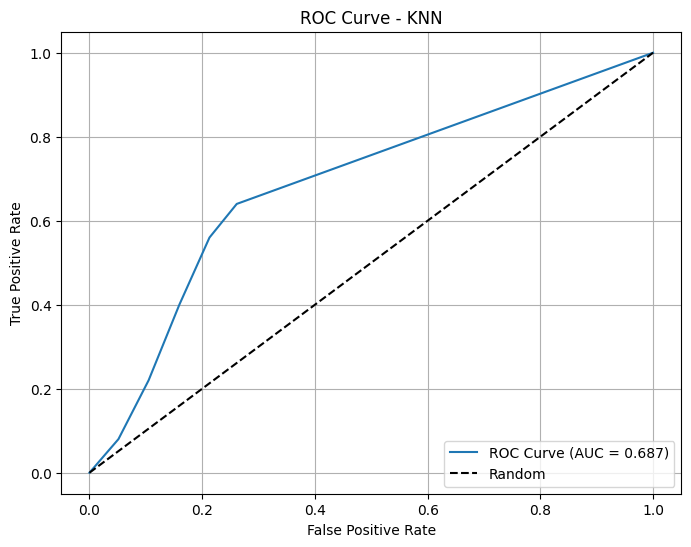


Creating voting ensemble...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Evaluating Voting Ensemble...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

<Figure size 800x600 with 0 Axes>

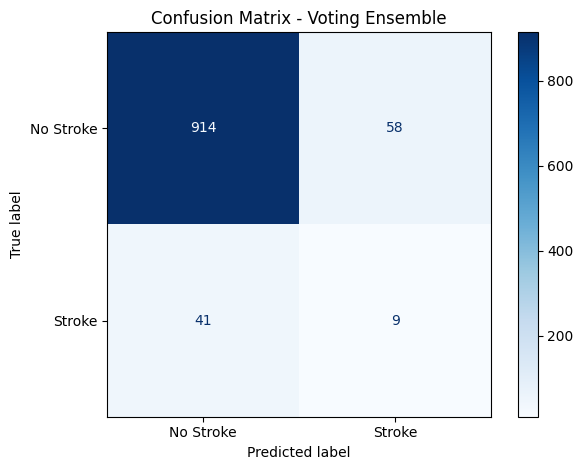

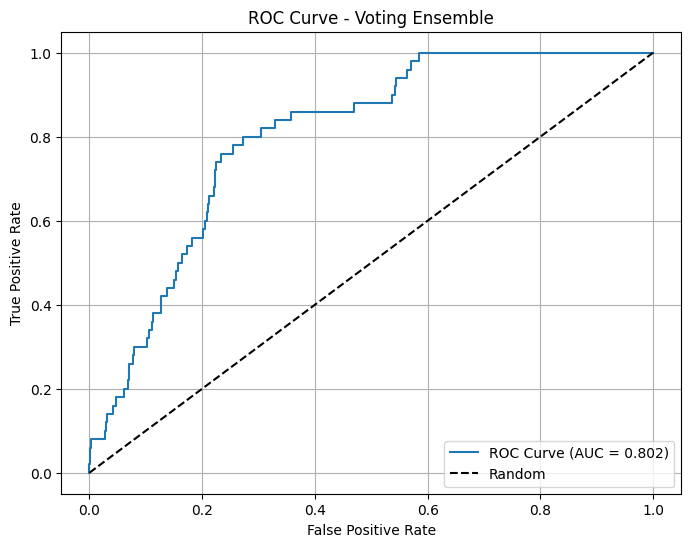


Creating stacking ensemble...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2158
[LightGBM] [Info] Number of data points in the train set: 7778, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3889, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

<Figure size 800x600 with 0 Axes>

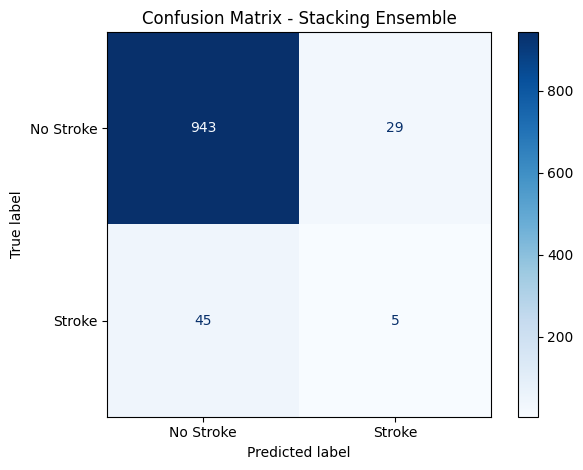

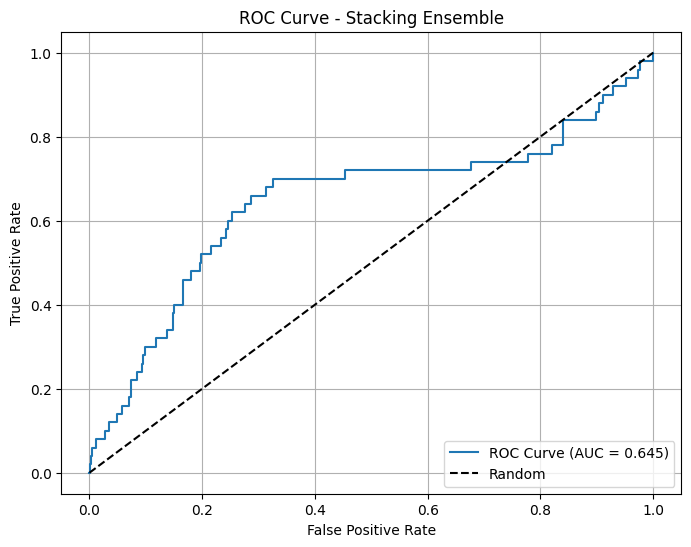


Best model: Logistic Regression
F1 Score: 0.2381
Precision: 0.1399
Recall: 0.8000
ROC AUC: 0.8445
Model saved to best_stroke_model.pickle

Model training and evaluation completed.


In [2]:
# Stroke Prediction Model Training and Evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# For metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           roc_auc_score, confusion_matrix, classification_report, 
                           ConfusionMatrixDisplay, roc_curve, precision_recall_curve)

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier, VotingClassifier, StackingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For imbalanced data
from imblearn.over_sampling import SMOTE, RandomOverSampler

# For reproducibility
RANDOM_STATE = 42

def load_data(file_path="healthcare-dataset-stroke-data.csv"):
    """Load and preprocess the stroke dataset"""
    # Load data
    df = pd.read_csv(file_path)
    
    # Drop ID column
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
    
    # Handle missing BMI values
    if 'bmi' in df.columns and df['bmi'].isnull().sum() > 0:
        print(f"Handling {df['bmi'].isnull().sum()} missing BMI values using median imputation")
        df['bmi'] = df['bmi'].fillna(df['bmi'].median())
    
    # Handle 'Other' gender
    if 'gender' in df.columns:
        df['gender'] = df['gender'].replace('Other', 'Female')
    
    # Convert binary features to string for one-hot encoding
    if 'stroke' in df.columns:
        binary_features = ['hypertension', 'heart_disease', 'stroke']
        df[binary_features] = df[binary_features].astype(str)
    
    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Split into features and target
    if 'stroke_1' in df_encoded.columns:
        X = df_encoded.drop('stroke_1', axis=1)
        y = df_encoded['stroke_1']
    else:
        X = df_encoded.drop('stroke', axis=1)
        y = df_encoded['stroke']
    
    return X, y

def split_and_scale_data(X, y, test_size=0.2):
    """Split data into train/test sets and scale features"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=RANDOM_STATE, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns
    )
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def handle_imbalance(X_train, y_train, method='smote'):
    """Handle imbalanced data using SMOTE or random oversampling"""
    print(f"Class distribution before resampling: {np.bincount(y_train.astype(int))}")
    
    if method == 'smote':
        resampler = SMOTE(random_state=RANDOM_STATE)
    elif method == 'random':
        resampler = RandomOverSampler(random_state=RANDOM_STATE)
    else:
        raise ValueError(f"Unknown method: {method}")
    
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    print(f"Class distribution after resampling: {np.bincount(y_resampled.astype(int))}")
    
    return X_resampled, y_resampled

def create_models():
    """Create a dictionary of models to evaluate"""
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
        'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
        'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
        'LightGBM': LGBMClassifier(random_state=RANDOM_STATE),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    return models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Train and evaluate a model, returning evaluation metrics
    """
    print(f"\nEvaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get probabilities if available
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        has_proba = True
    except:
        y_pred_proba = None
        has_proba = False
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    
    if has_proba:
        metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    
    if has_proba:
        print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    
    # Return the metrics and predictions for further analysis
    return metrics, y_pred, y_pred_proba if has_proba else None, model

def plot_confusion_matrix_custom(y_test, y_pred, model_name="Model"):
    """Plot confusion matrix for a model using ConfusionMatrixDisplay"""
    cm = confusion_matrix(y_test, y_pred)
    
    # Create ConfusionMatrixDisplay manually
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke', 'Stroke'])
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

def plot_roc_curve_custom(y_test, y_pred_proba, model_name="Model"):
    """Plot ROC curve for a model"""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def create_voting_ensemble(models_dict, X_train, y_train, voting='soft'):
    """Create a voting ensemble from trained models"""
    # Create a list of (name, model) tuples for VotingClassifier
    estimators = []
    
    for name, (_, _, _, model) in models_dict.items():
        estimators.append((name, model))
    
    # Create and train the voting ensemble
    ensemble = VotingClassifier(estimators=estimators, voting=voting)
    ensemble.fit(X_train, y_train)
    
    return ensemble

def create_stacking_ensemble(models_dict, X_train, y_train):
    """Create a stacking ensemble from trained models"""
    # Create a list of (name, model) tuples for StackingClassifier
    estimators = []
    
    for name, (_, _, _, model) in models_dict.items():
        estimators.append((name, model))
    
    # Create and train the stacking ensemble
    ensemble = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(max_iter=1000),
        cv=5
    )
    ensemble.fit(X_train, y_train)
    
    return ensemble

def find_best_model(models_metrics):
    """Find the best model based on F1 score"""
    best_model_name = max(models_metrics.items(), key=lambda x: x[1][0]['f1'])[0]
    best_metrics, _, _, best_model = models_metrics[best_model_name]
    
    print(f"\nBest model: {best_model_name}")
    print(f"F1 Score: {best_metrics['f1']:.4f}")
    print(f"Precision: {best_metrics['precision']:.4f}")
    print(f"Recall: {best_metrics['recall']:.4f}")
    
    if 'roc_auc' in best_metrics:
        print(f"ROC AUC: {best_metrics['roc_auc']:.4f}")
    
    return best_model_name, best_model

def save_model(model, filepath="best_stroke_model.pickle"):
    """Save the model to a file"""
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"Model saved to {filepath}")

def plot_feature_importance(model, feature_names, top_n=20):
    """Plot feature importance for tree-based models"""
    if not hasattr(model, 'feature_importances_'):
        print("This model doesn't have feature_importances_ attribute.")
        return
    
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Select top N features
    n_features = min(top_n, len(feature_names))
    top_indices = indices[:n_features]
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances", fontsize=16)
    plt.bar(range(n_features), importances[top_indices], align="center")
    plt.xticks(range(n_features), [feature_names[i] for i in top_indices], rotation=90)
    plt.xlim([-1, n_features])
    plt.tight_layout()
    plt.show()

def predict_sample(model, scaler, features, feature_names):
    """Predict stroke risk for a sample"""
    # Create a DataFrame with the features
    sample = pd.DataFrame([features], columns=feature_names)
    
    # Scale numerical features if needed
    sample_scaled = scaler.transform(sample)
    
    # Make prediction
    prediction = model.predict(sample_scaled)[0]
    
    # Get probability if available
    try:
        probability = model.predict_proba(sample_scaled)[0, 1]
        has_proba = True
    except:
        probability = None
        has_proba = False
    
    # Print prediction
    print("\nPrediction:")
    if prediction == 1:
        print("⚠️ HIGH RISK OF STROKE DETECTED ⚠️")
    else:
        print("✓ Low risk of stroke")
    
    if has_proba:
        print(f"Probability of stroke: {probability:.2%}")
    
    return prediction, probability if has_proba else None

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X, y = load_data()
    
    # Split and scale data
    print("\nSplitting and scaling data...")
    X_train, X_test, y_train, y_test, scaler = split_and_scale_data(X, y)
    
    # Handle imbalanced data
    print("\nHandling imbalanced data...")
    X_train_resampled, y_train_resampled = handle_imbalance(X_train, y_train, method='smote')
    
    # Create models
    print("\nCreating models...")
    models = create_models()
    
    # Evaluate models
    model_results = {}
    
    for name, model in models.items():
        metrics, y_pred, y_pred_proba, trained_model = evaluate_model(
            model, X_train_resampled, X_test, y_train_resampled, y_test, name
        )
        model_results[name] = (metrics, y_pred, y_pred_proba, trained_model)
        
        # Plot confusion matrix and ROC curve if available
        plot_confusion_matrix_custom(y_test, y_pred, name)
        
        if y_pred_proba is not None:
            plot_roc_curve_custom(y_test, y_pred_proba, name)
    
    # Create voting ensemble
    print("\nCreating voting ensemble...")
    voting_ensemble = create_voting_ensemble(model_results, X_train_resampled, y_train_resampled)
    
    # Evaluate voting ensemble
    voting_metrics, voting_pred, voting_proba, _ = evaluate_model(
        voting_ensemble, X_train_resampled, X_test, y_train_resampled, y_test, "Voting Ensemble"
    )
    model_results["Voting Ensemble"] = (voting_metrics, voting_pred, voting_proba, voting_ensemble)
    
    # Plot confusion matrix and ROC curve for voting ensemble
    plot_confusion_matrix_custom(y_test, voting_pred, "Voting Ensemble")
    
    if voting_proba is not None:
        plot_roc_curve_custom(y_test, voting_proba, "Voting Ensemble")
    
    # Create stacking ensemble
    print("\nCreating stacking ensemble...")
    stacking_ensemble = create_stacking_ensemble(model_results, X_train_resampled, y_train_resampled)
    
    # Evaluate stacking ensemble
    stacking_metrics, stacking_pred, stacking_proba, _ = evaluate_model(
        stacking_ensemble, X_train_resampled, X_test, y_train_resampled, y_test, "Stacking Ensemble"
    )
    model_results["Stacking Ensemble"] = (stacking_metrics, stacking_pred, stacking_proba, stacking_ensemble)
    
    # Plot confusion matrix and ROC curve for stacking ensemble
    plot_confusion_matrix_custom(y_test, stacking_pred, "Stacking Ensemble")
    
    if stacking_proba is not None:
        plot_roc_curve_custom(y_test, stacking_proba, "Stacking Ensemble")
    
    # Find best model
    best_model_name, best_model = find_best_model(model_results)
    
    # Plot feature importance for the best model if it's a tree-based model
    if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost", "LightGBM"]:
        plot_feature_importance(best_model, X.columns.tolist())
    
    # Save the best model
    save_model(best_model)
    
    # Also save the scaler for later use
    with open('stroke_model_scaler.pickle', 'wb') as f:
        pickle.dump(scaler, f)
    
    print("\nModel training and evaluation completed.")

if __name__ == "__main__":
    main()